In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sales-forecasting


In [4]:
import numpy as np
import pandas as pd

In [6]:
!kaggle datasets download rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 784MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('sales-forecasting.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
df = pd.read_csv('/content/train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


from matplotlib import pyplot as plt
df['Row ID'].plot(kind='hist', bins=20, title='Row ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Postal Code'].plot(kind='hist', bins=20, title='Postal Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Ship Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Row ID', y='Postal Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Postal Code', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Row ID']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Row ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ship Mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ship Mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Row ID')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Row ID']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Row ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Segment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Segment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Row ID')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Row ID']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Row ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Row ID')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Row ID']
  ys = series['Postal Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Row ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Row ID')
_ = plt.ylabel('Postal Code')

from matplotlib import pyplot as plt
df['Row ID'].plot(kind='line', figsize=(8, 4), title='Row ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Postal Code'].plot(kind='line', figsize=(8, 4), title='Postal Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Segment'].value_counts()
    for x_label, grp in df.groupby('Ship Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ship Mode')
_ = plt.ylabel('Segment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in df.groupby('Segment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Segment')
_ = plt.ylabel('Region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('Category')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Ship Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Row ID', y='Ship Mode', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Row ID', y='Segment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Row ID', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Row ID', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
df.shape

(9800, 18)

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [15]:
df.size

176400

In [16]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7255,7256,CA-2017-152730,30/05/2017,04/06/2017,Standard Class,EM-14140,Eugene Moren,Home Office,United States,Superior,Wisconsin,54880.0,Central,OFF-ST-10000876,Office Supplies,Storage,Eldon Simplefile Box Office,49.760
4155,4156,CA-2017-139689,29/12/2017,03/01/2018,Standard Class,MP-17965,Michael Paige,Corporate,United States,Bristol,Tennessee,37620.0,South,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,2.808
6171,6172,CA-2017-141523,19/12/2017,24/12/2017,Second Class,MH-17440,Mark Haberlin,Corporate,United States,New York City,New York,10035.0,East,OFF-AR-10001545,Office Supplies,Art,Newell 326,3.520
9434,9435,CA-2016-119627,17/08/2016,23/08/2016,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Peoria,Arizona,85345.0,West,OFF-AR-10000203,Office Supplies,Art,Newell 336,10.272
9260,9261,CA-2018-167976,11/11/2018,14/11/2018,Second Class,JL-15505,Jeremy Lonsdale,Consumer,United States,Aberdeen,South Dakota,57401.0,Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [18]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [19]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [20]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.corr()

ValueError: could not convert string to float: 'CA-2017-152156'

In [25]:
df.corr()['Sales']

ValueError: could not convert string to float: 'CA-2017-152156'

**Univariable EDA**

Categorial Data

In [26]:
import seaborn as sns

Countplot

<Axes: xlabel='count', ylabel='Segment'>

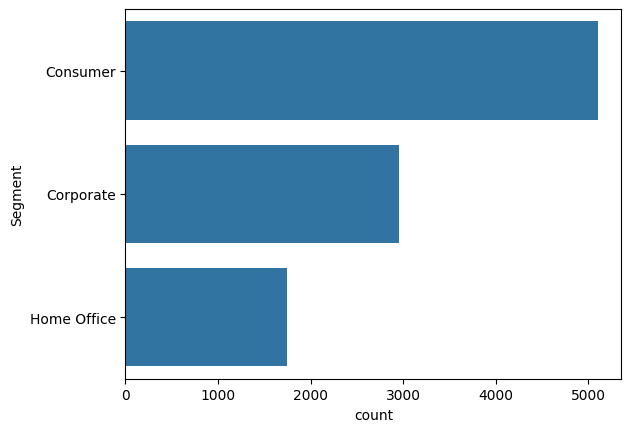

In [27]:
sns.countplot(df['Segment'])

<Axes: xlabel='count', ylabel='Region'>

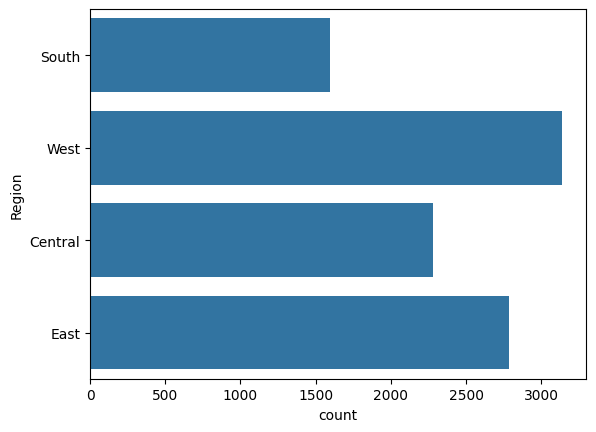

In [28]:
sns.countplot(df['Region'])

<Axes: xlabel='count', ylabel='Category'>

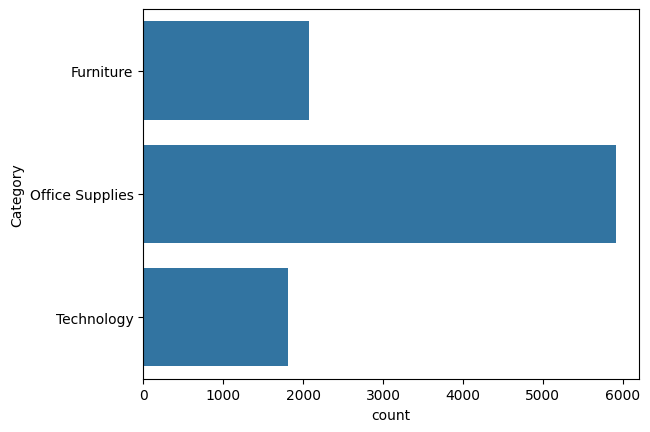

In [29]:
sns.countplot(df['Category'])

<Axes: xlabel='count', ylabel='Country'>

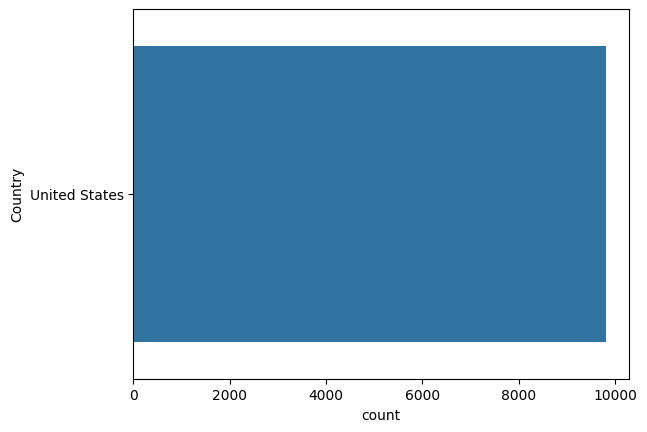

In [30]:
sns.countplot(df['Country'])

<Axes: xlabel='count', ylabel='City'>

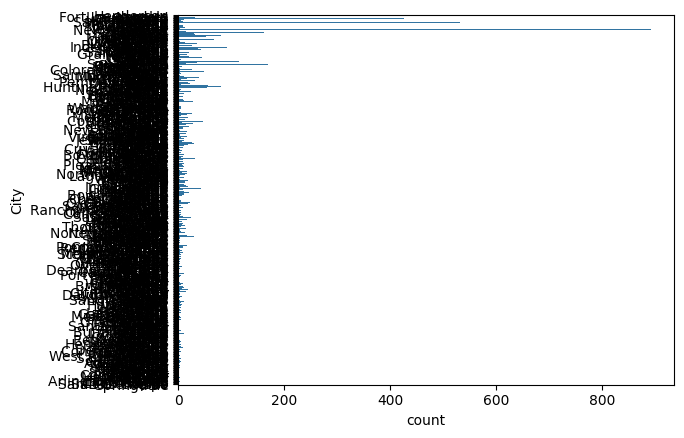

In [32]:
sns.countplot(df['City'])

<Axes: xlabel='count', ylabel='State'>

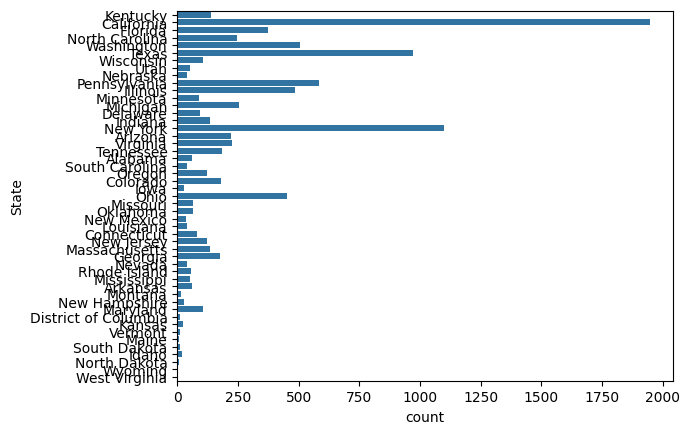

In [33]:
sns.countplot(df['State'])

Pie Chart

<Axes: ylabel='count'>

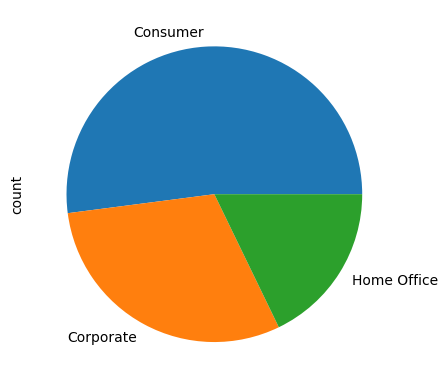

In [36]:
df['Segment'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

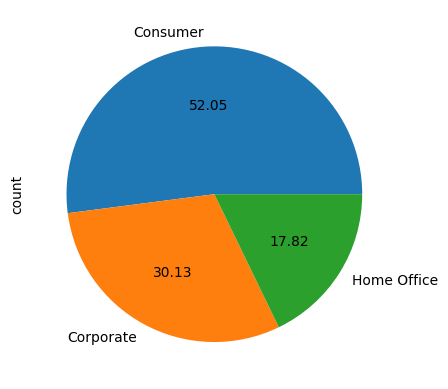

In [37]:
df['Segment'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

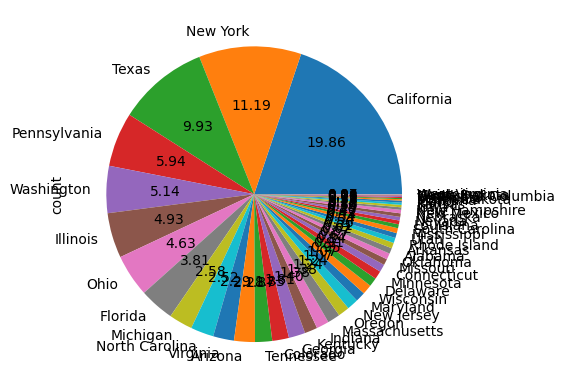

In [38]:
df['State'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

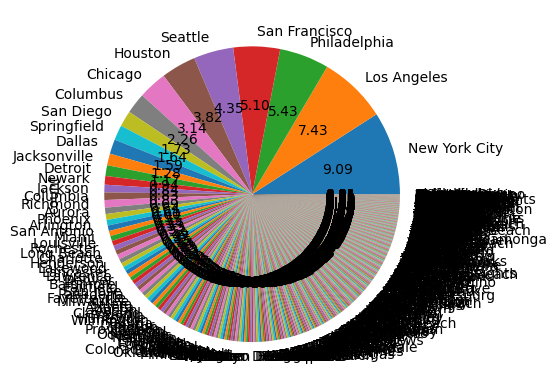

In [39]:
df['City'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

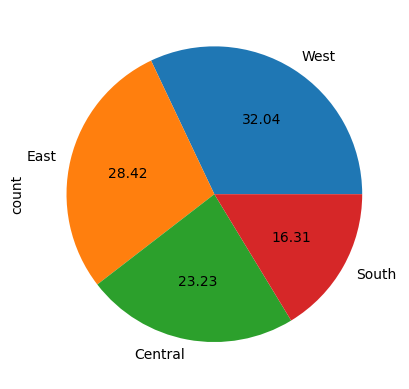

In [40]:
df['Region'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

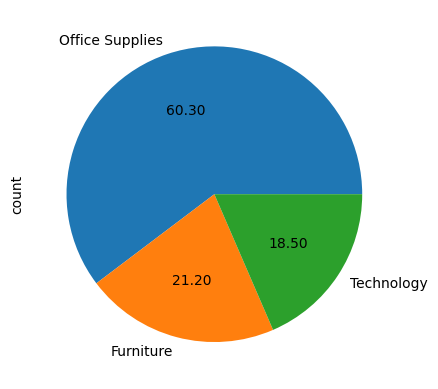

In [41]:
df['Category'].value_counts().plot(kind='pie',autopct='%.2f')

Numerical Value

Histogram

In [43]:
import matplotlib.pyplot as plt


(array([9.685e+03, 8.800e+01, 1.300e+01, 6.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 2.26424760e+03, 4.52805120e+03, 6.79185480e+03,
        9.05565840e+03, 1.13194620e+04, 1.35832656e+04, 1.58470692e+04,
        1.81108728e+04, 2.03746764e+04, 2.26384800e+04]),
 <BarContainer object of 10 artists>)

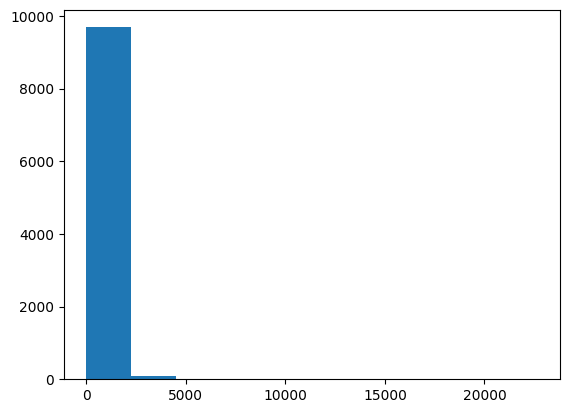

In [48]:
plt.hist(df['Sales'])

Distplot

/tmp/ipython-input-54-793008046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],bins=15)


<Axes: xlabel='Sales', ylabel='Density'>

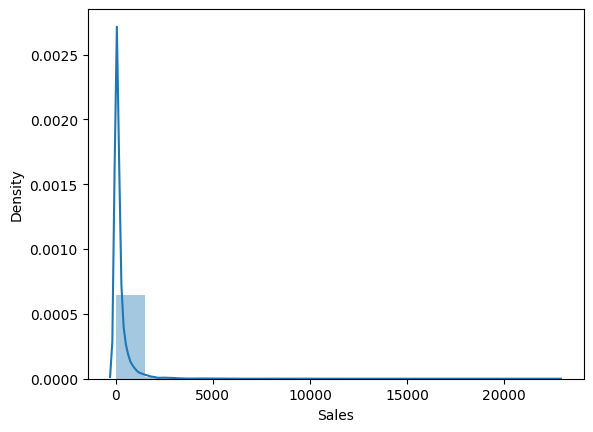

In [54]:
sns.distplot(df['Sales'],bins=15)

Boxplot

<Axes: ylabel='Sales'>

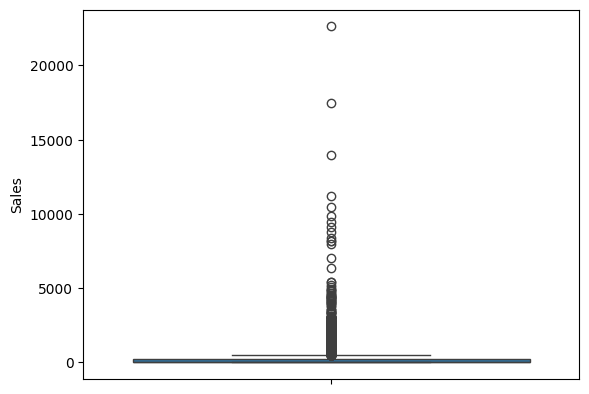

In [55]:
sns.boxplot(df['Sales'])

In [56]:
df['Sales'].min()

0.444

In [57]:
df['Sales'].max()

22638.48

In [58]:
df['Sales'].mean()

np.float64(230.7690594591837)

In [62]:
df['Sales'].skew()

np.float64(12.983482865034619)

**Multivariable EDA is not that relevent here**

Categorial - Categorical;

In [68]:
pd.crosstab(df['Region'],df['Category'])

Category,Furniture,Office Supplies,Technology
Region,,,
Central,470,1399,408
East,591,1667,527
South,326,983,289
West,691,1860,589


In [69]:
pd.crosstab(df['Segment'],df['Category'])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1093,3072,936
Corporate,628,1783,542
Home Office,357,1054,335


In [70]:
pd.crosstab(df['Segment'],df['Region'])

Region,Central,East,South,West
Segment,,,,
Consumer,1188,1444,831,1638
Corporate,661,850,500,942
Home Office,428,491,267,560


Heat Map

<Axes: xlabel='Category', ylabel='Region'>

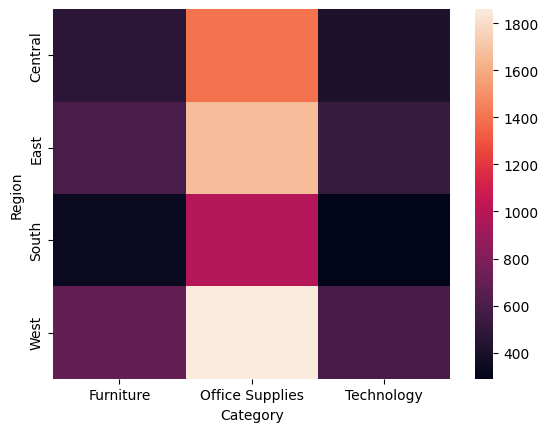

In [72]:
sns.heatmap(pd.crosstab(df['Region'],df['Category']))

<Axes: xlabel='Category', ylabel='Segment'>

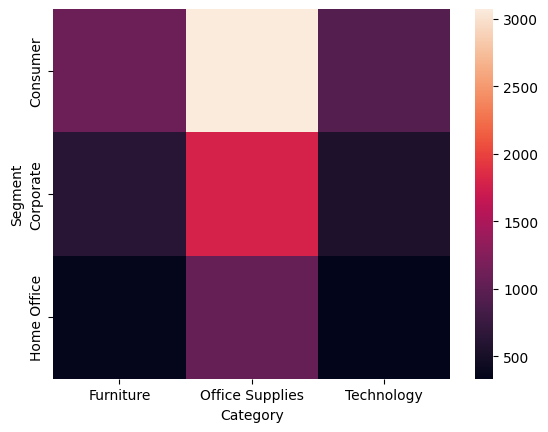

In [73]:
sns.heatmap(pd.crosstab(df['Segment'],df['Category']))

<Axes: xlabel='Region', ylabel='Segment'>

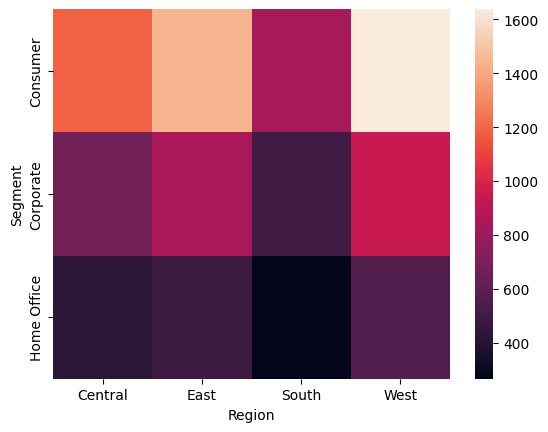

In [74]:
sns.heatmap(pd.crosstab(df['Segment'],df['Region']))

Groupby

In [78]:
df.groupby('Segment').mean()['Category']

TypeError: agg function failed [how->mean,dtype->object]

ClusterMap

In [79]:
pd.crosstab(df['Region'],df['Category'])

Category,Furniture,Office Supplies,Technology
Region,,,
Central,470,1399,408
East,591,1667,527
South,326,983,289
West,691,1860,589


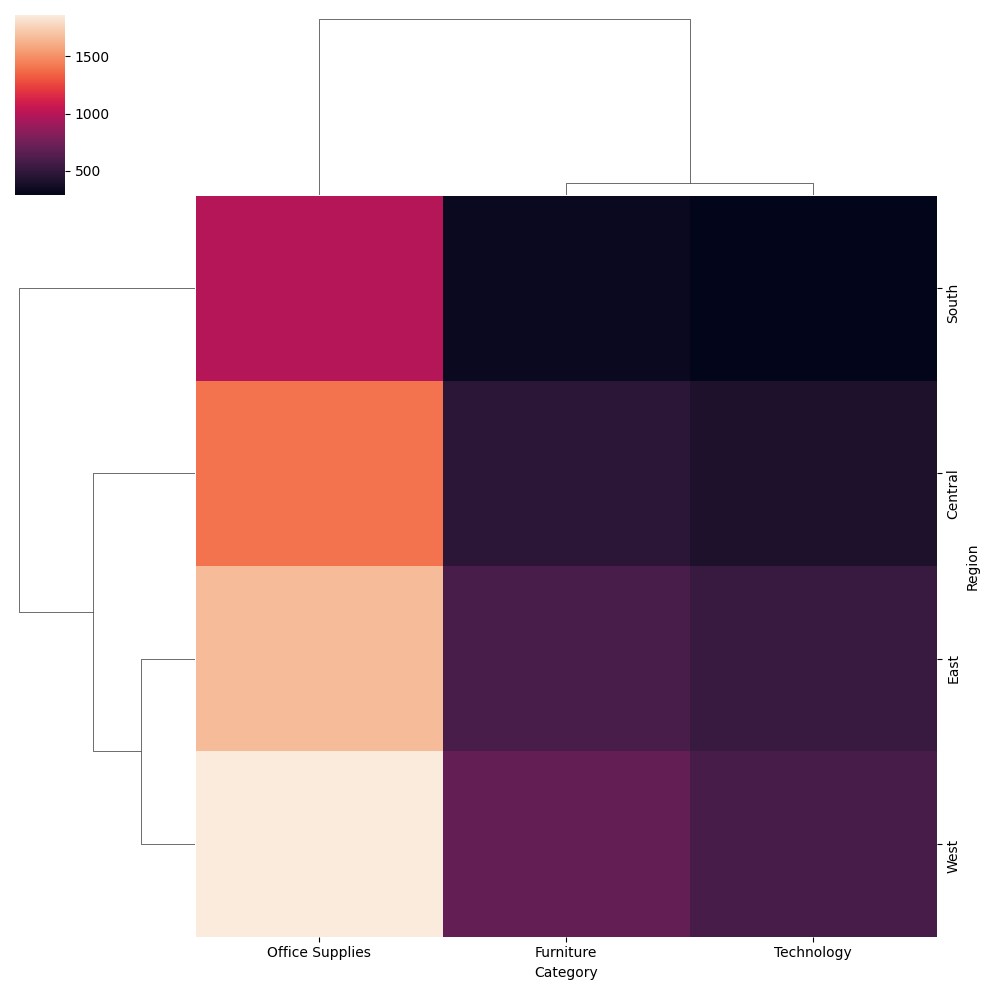

In [80]:
sns.clustermap(pd.crosstab(df['Region'],df['Category']))

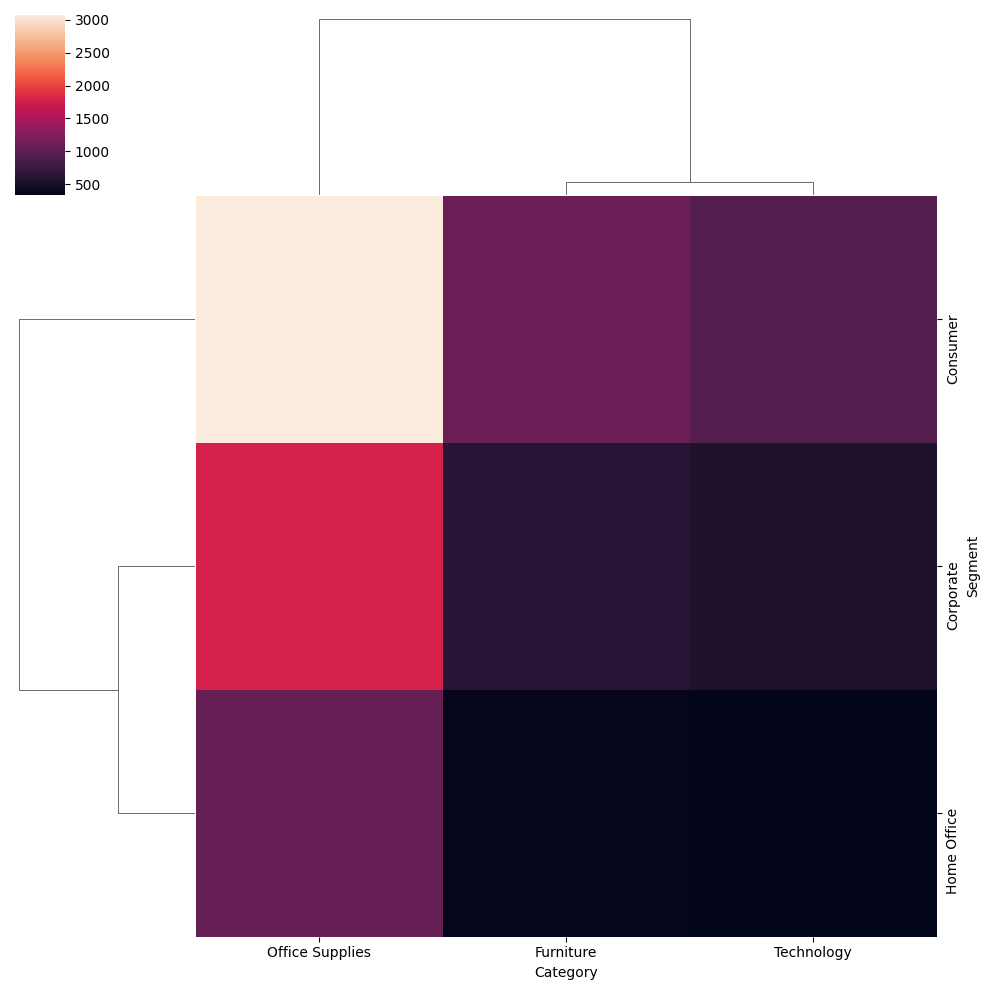

In [81]:
sns.clustermap(pd.crosstab(df['Segment'],df['Category']))